## Preliminaries

### Imports

In [2]:
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import train_test_split, KFold

import sys
sys.path.append("../..")
from E4525_ML import mnist
from E4525_ML.multiclass_logistic import LogisticGDClassifier
%matplotlib inline

In [71]:
import warnings
warnings.filterwarnings("ignore")

### Random Seed

In [3]:
seed=458
np.random.seed(seed)

### Data Directories

In [4]:
data_dir=r"../../raw/mnist/"

<div class="alert alert-block alert-info"> Problem 0 </div>
Make sure to **update** the file `mnist.py` on the `E4525_ML` directory (new version posted on Canvas).

You will need the **updated** version of that file to complete the last section of this notebook.

## Read Data

<div class="alert alert-block alert-info"> Problem 1.0 </div>
Read MNIST data set and labels,  also read the MNMIST test data set and test labels

In [9]:
data_file=data_dir+"train-images-idx3-ubyte.gz"
label_file=data_dir+"train-labels-idx1-ubyte.gz"

test_data_file=data_dir+"t10k-images-idx3-ubyte.gz"
test_label_file=data_dir+"t10k-labels-idx1-ubyte.gz"

data=mnist.read_images(data_file)
label=mnist.read_labels(label_file)
    
test_data=mnist.read_images(test_data_file)
test_label=mnist.read_labels(test_label_file)
    
print(data.shape,label.shape)

(60000, 28, 28) (60000,)


<div class="alert alert-block alert-info"> Problem 1.2 </div>
Use `skelearn`'s `train_test_split` function to separate the MNIST samples into  a 15% validation set and a  training sample.


In [22]:
x_train, x_validation, y_train, y_validation=train_test_split(data, label, test_size=0.15)

## LDA

<div class="alert alert-block alert-info"> Problem 2.1 </div>
fit an LDA model on the training data set using `sklearns` `LinearDiscriminantAnalysis` classifier 

In [17]:
lda=LinearDiscriminantAnalysis()
x_train_reshape=x_train.reshape(len(x_train), -1)
lda.fit(x_train_reshape, y_train)

/Users/Renaissance/anaconda2/envs/3point6/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

<div class="alert alert-block alert-info"> Problem 2.2 </div>
Compute model accuracy on the training set

In [20]:
np.average(y_train==lda.predict(x_train_reshape))

0.8729803921568627

<div class="alert alert-block alert-info"> Problem 2.3 </div>
Compute accuracy of the model on the validation set

In [27]:
x_validation_reshape=x_validation.reshape(len(x_validation), -1)
np.average(y_validation==lda.predict(x_validation_reshape))

0.8683333333333333

## Logistic Regression

<div class="alert alert-block alert-info"> Problem 3.1 </div>

Use the `LogisticGDClassifier` class from `E4525_ML.multiclass_logistic` module to fit a logistic model

In [24]:
lc=LogisticGDClassifier()

In [ ]:
lc.fit(x_train_reshape, y_train)

<div class="alert alert-block alert-info"> Problem 3.2 </div>
Compute model accuracy in the training data set

In [28]:
np.average(lc.predict(x_train_reshape)==y_train)

0.13031372549019607

<div class="alert alert-block alert-info"> Problem 3.3 </div>
Compute model accuracy in the valuation data set

In [30]:
np.average(lc.predict(x_validation_reshape)==y_validation)

0.08766666666666667

## Feature Engineering in one Dimension

In [34]:
N=50
N_val=1000

In [35]:
def f(x):
    return 10*(1-4*(np.abs(np.abs(x)-1)))

In [36]:
def generate_sample(N):
    X=np.random.uniform(-2,2,N)
    eta=f(X)
    eta.shape
    theta=1/(1+np.exp(-eta))
    Y= np.random.uniform(0,1,N)>theta
    return X,Y

<div class="alert alert-block alert-info"> Problem 4.0 </div>
Generate 
1. a training sample of variables $X$ and $Y$ with $N$ data samples
2. a valuation set with   $N_{val}$ samples
3. a test set with $N_{val}$ samples

In [39]:
train_x, train_y=generate_sample(N)
validation_x, validation_y=generate_sample(N_val)
test_x, test_y=generate_sample(N_val)

<div class="alert alert-block alert-info"> Problem 4.1 </div>
What is the proportion of positive class ($Y=1$) samples on the training data?

In [40]:
np.average(train_y==1)

0.78

<div class="alert alert-block alert-info"> Problem 4.2 </div>
Write a function able to generate the feature matrix
$$
    H_{i,d}= h_d(x_i)
$$
for $i=1,\dots N$ and $d=1,\dots D$

where the functions $h_d(x)$ are defined as 
$$
    h_d(x) = x^d
$$

[HINT] be careful to include $h_D$ in the range of functions

In [58]:
def feature_matrix(N, D, X):
    H=np.zeros((N, D))
    for i in range(N):
        for j in range(1, D+1):
            H[i, j-1]=X[i]**j
    return H

<div class="alert alert-block alert-info"> Problem 4.3 </div>
1. Train  a logistic regression model (use sklearn `LogisticRegression` class) over the training data you already generated. 
2. Use the valuation set  to select the best value of $D$ using accuracy as selection criteria.
3. Plot accuracy on the  training and valuation sets as a function of $D$.

[HINT]
1. You only need to consider the range $D=1,\dots 10$.
2. Remember to disable regularization by setting the parameter $C$ of the `LogisticRegression` class to a very large number.



In [78]:
train_accu=[]
validation_accu=[]
N=train_x.shape[0]
Nv=validation_x.shape[0]

for d in range(1, 11):
    lr=LogisticRegression(C=10000)
    H_train=feature_matrix(N, d, train_x)
    H_validation=feature_matrix(Nv, d, validation_x)
    
    lr.fit(H_train, train_y)
    train_accu.append(np.average(lr.predict(H_train)==train_y))
    validation_accu.append(np.average(lr.predict(H_validation)==validation_y))

best_d=np.array(validation_accu).argmax()
print('The best d is:', best_d)
print('The validation accuracy is: ', validation_accu[best_d])

The best d is: 5
The validation accuracy is:  0.924


Text(0.5, 1.0, 'validation accuracy vs. d')

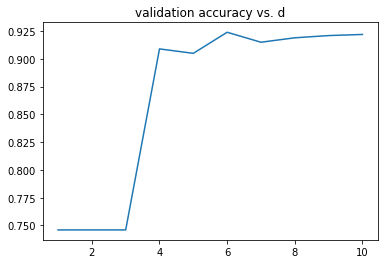

In [81]:
plt.plot(np.arange(1, 11), validation_accu)
plt.title('validation accuracy vs. d')

<div class="alert alert-block alert-info"> Problem 4.4 </div>
Use the test set  to measure the accuracy for the optimal classifier you have found
(do not use data from the  valuation set to train the classifier)

In [82]:
H_train=feature_matrix(N, best_d, train_x)
lr=LogisticRegression(C=10000)
lr.fit(H_train, train_y)
H_test=feature_matrix(N_val, best_d, test_x)
accu_test=np.average(lr.predict(H_test)==test_y)

In [83]:
print('The accuracy on the test set is: ', accu_test)

The accuracy on the test set is:  0.919


## Feature Engineering for MNIST sample

<div class="alert alert-block alert-info"> Problem 5.1 </div>
In this problem we will use `mnist.ImageFeatureModel` class to find the optimal number of orientations $\theta$  of the oriented gradients
features for the MNIST data set.

1. use `mnist.ImageFeatureModel` to generate image oriented gradient features.
2. use  `LogisticGDClassifier` as the base model
3. set the block size to 4 ( this is to reduce memory use)
4. select the best number of orientations by performing  5-Fold cross-validation on the full MNIST data set.
5. Consider only [1,2,4,8] as possible values for the orientation
6. Plot number of orientations vs validation accuracy

[HINT] 
1. the `validation_model` function below will be useful to perform cross-validation
2. If you run into memory trouble (your computer crashes), reduce the size of the data set.
Make sure to  indicate this clearly on your solution.
3. This problem is computationally expensive, make sure to allocate time to resolve it.

In [85]:
def validate_model(model,K,X,Y):
    folder=KFold(K,shuffle=True)
    folds=folder.split(X,Y)
    val_error=0.0
    fold_count=0
    for fold in folds:
        train_idx,val_idx=fold
        x_train=X[train_idx]
        y_train=Y[train_idx]
        x_val=X[val_idx]
        y_val=Y[val_idx]     
        model.fit(x_train,y_train)
        y_pred=model.predict(x_val)
        val_err=np.mean(y_val==y_pred)
        val_error+=val_err
        fold_count+=1
        print(fold_count,val_err)
    return val_error/K
      

In [86]:
lgdc=LogisticGDClassifier()

K=5
block=4
orientations=[1,2,4,8,16,32]

val_accuracy=[]
for orientation in orientations:
    model=mnist.ImageFeatureModel(lgdc,size=block,orientations=orientation)
    accuracy=validate_model(model,K,images,labels)
    val_accuracy.append(accuracy)
    print("orientation=",orientation,accuracy)

2020-03-16 23:53:15|	0: TRAIN loss 2.3292,  acc 0.0690
2020-03-16 23:53:16|	10: TRAIN loss 0.5831,  acc 0.8230
2020-03-16 23:53:17|	20: TRAIN loss 0.5193,  acc 0.8530
2020-03-16 23:53:17|	30: TRAIN loss 0.5161,  acc 0.8470
2020-03-16 23:53:18|	40: TRAIN loss 0.4887,  acc 0.8610
2020-03-16 23:53:19|	50: TRAIN loss 0.4977,  acc 0.8450
2020-03-16 23:53:20|	60: TRAIN loss 0.4414,  acc 0.8660
2020-03-16 23:53:21|	70: TRAIN loss 0.4198,  acc 0.8830
2020-03-16 23:53:22|	80: TRAIN loss 0.4485,  acc 0.8640
2020-03-16 23:53:23|	90: TRAIN loss 0.4907,  acc 0.8480
2020-03-16 23:53:24|	99: TRAIN loss 0.5059,  acc 0.8530
1 0.8606666666666667
2020-03-16 23:53:32|	0: TRAIN loss 2.3047,  acc 0.1270
2020-03-16 23:53:33|	10: TRAIN loss 0.6088,  acc 0.8170
2020-03-16 23:53:34|	20: TRAIN loss 0.5394,  acc 0.8380
2020-03-16 23:53:35|	30: TRAIN loss 0.5030,  acc 0.8540
2020-03-16 23:53:36|	40: TRAIN loss 0.4755,  acc 0.8650
2020-03-16 23:53:37|	50: TRAIN loss 0.4937,  acc 0.8420
2020-03-16 23:53:37|	60: TRAI

2020-03-16 23:57:49|	30: TRAIN loss 0.1331,  acc 0.9730
2020-03-16 23:57:50|	40: TRAIN loss 0.1484,  acc 0.9610
2020-03-16 23:57:52|	50: TRAIN loss 0.1489,  acc 0.9580
2020-03-16 23:57:53|	60: TRAIN loss 0.1190,  acc 0.9660
2020-03-16 23:57:55|	70: TRAIN loss 0.1209,  acc 0.9720
2020-03-16 23:57:56|	80: TRAIN loss 0.1109,  acc 0.9730
2020-03-16 23:57:57|	90: TRAIN loss 0.0994,  acc 0.9720
2020-03-16 23:57:59|	99: TRAIN loss 0.1199,  acc 0.9720
4 0.9643333333333334
2020-03-16 23:58:10|	0: TRAIN loss 2.3166,  acc 0.0820
2020-03-16 23:58:11|	10: TRAIN loss 0.2222,  acc 0.9490
2020-03-16 23:58:12|	20: TRAIN loss 0.2028,  acc 0.9510
2020-03-16 23:58:14|	30: TRAIN loss 0.1748,  acc 0.9540
2020-03-16 23:58:15|	40: TRAIN loss 0.1158,  acc 0.9720
2020-03-16 23:58:17|	50: TRAIN loss 0.1408,  acc 0.9590
2020-03-16 23:58:18|	60: TRAIN loss 0.1463,  acc 0.9640
2020-03-16 23:58:19|	70: TRAIN loss 0.1326,  acc 0.9620
2020-03-16 23:58:21|	80: TRAIN loss 0.1331,  acc 0.9680
2020-03-16 23:58:22|	90: TRA

2020-03-17 00:10:32|	80: TRAIN loss 0.0711,  acc 0.9770
2020-03-17 00:10:38|	90: TRAIN loss 0.0452,  acc 0.9870
2020-03-17 00:10:45|	99: TRAIN loss 0.0816,  acc 0.9760
2 0.97675
2020-03-17 00:11:36|	0: TRAIN loss 2.3002,  acc 0.0790
2020-03-17 00:11:43|	10: TRAIN loss 0.1162,  acc 0.9730
2020-03-17 00:11:49|	20: TRAIN loss 0.0980,  acc 0.9710
2020-03-17 00:11:56|	30: TRAIN loss 0.1159,  acc 0.9750
2020-03-17 00:12:03|	40: TRAIN loss 0.0766,  acc 0.9770
2020-03-17 00:12:09|	50: TRAIN loss 0.0635,  acc 0.9780
2020-03-17 00:12:16|	60: TRAIN loss 0.0807,  acc 0.9750
2020-03-17 00:12:23|	70: TRAIN loss 0.0805,  acc 0.9740
2020-03-17 00:12:30|	80: TRAIN loss 0.0654,  acc 0.9840
2020-03-17 00:12:34|	85: TRAIN loss 0.0784,  acc 0.9770
3 0.9788333333333333
2020-03-17 00:13:26|	0: TRAIN loss 2.2882,  acc 0.1790
2020-03-17 00:13:33|	10: TRAIN loss 0.1310,  acc 0.9640
2020-03-17 00:13:39|	20: TRAIN loss 0.1036,  acc 0.9780
2020-03-17 00:13:46|	30: TRAIN loss 0.0732,  acc 0.9820
2020-03-17 00:13:53

In [88]:
best_index=np.array(val_accuracy).argmax()
best_orientation=val_accuracy[best_index]
print('The best orientation is: ', orientations[best_index])
print('The validation accuracy is: ', val_accuracy[best_index])

The best orientation is:  32
The validation accuracy is:  0.9771833333333333


Text(0.5, 1.0, 'validation accuracy vs.  orientations')

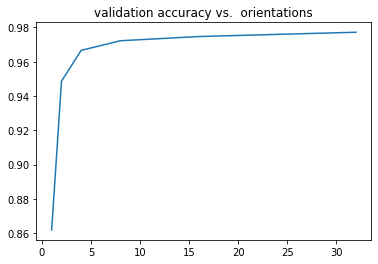

In [89]:
plt.plot(orientations, val_accuracy)
plt.title('validation accuracy vs.  orientations')